In [1]:
import astropy.units as un
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.stats import median_absolute_deviation as mad
from astropy.units import Quantity
from astropy.wcs import WCS

In [2]:
def get_lims(wcs: WCS = None, radius: Quantity = None, center_coord: SkyCoord = None):
    if isinstance(radius, Quantity):
        if radius.isscalar:
            radius_x = radius_y = radius
        else:
            radius_x = radius[0]
            radius_y = radius[1]

    else:
        if isinstance(radius, list):
            radius_x = radius[0] * un.deg
            radius_y = radius[1] * un.deg
        else:
            radius_x = radius_y = radius * un.deg

    left_corner = SkyCoord(ra=center_coord.ra - radius_x, dec=center_coord.dec - radius_y)
    right_corner = SkyCoord(ra=center_coord.ra + radius_x, dec=center_coord.dec + radius_y)
    left, up = left_corner.to_pixel(wcs, origin=0)
    right, down = right_corner.to_pixel(wcs, origin=0)
    xlim = [int(right), int(left)]
    ylim = [int(up), int(down)]
    return xlim, ylim

In [3]:
rm_hdu = fits.open(
    "/home/miguel/Documents/datasets/A1314_JVLA/mfs/rm_images/max_faraday_depth.fits"
)[0]
p_hdu = fits.open(
    "/home/miguel/Documents/datasets/A1314_JVLA/mfs/rm_images/max_rotated_intensity.fits"
)[0]
sigma_qu_hdu = fits.open(
    "/home/miguel/Documents/datasets/A1314_JVLA/mfs/rm_images/sigma_qu_faraday.fits"
)[0]
sigma_phi_hdu = fits.open(
    "/home/miguel/Documents/datasets/A1314_JVLA/mfs/rm_images/sigma_phi_peak.fits"
)[0]

In [4]:
#center_coord = SkyCoord(ra=173.705 * un.deg,dec=49.077 *un.deg, frame="fk5") # Center Source
#center_coord = SkyCoord(ra=173.479 * un.deg,dec=49.064 *un.deg, frame="fk5") # C-W Source
#center_coord = SkyCoord(ra=173.654 * un.deg,dec=48.978 *un.deg, frame="fk5") # C-S Extended
#center_coord = SkyCoord(ra=173.453 * un.deg,dec=48.985 *un.deg, frame="fk5") # S-W Source
center_coord = SkyCoord(ra=173.803 * un.deg, dec=48.966 * un.deg, frame="fk5")  # S-E Source

In [5]:
wcs = WCS(rm_hdu.header, naxis=2)

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [6]:
rm = rm_hdu.data
p = p_hdu.data
sigma_qu = sigma_qu_hdu.data
sigma_phi = sigma_phi_hdu.data

In [7]:
rm = np.where(p > 6 * sigma_qu, rm, np.nan)
sigma_phi = np.where(p > 6 * sigma_qu, sigma_phi, np.nan)

In [8]:
x_lim, y_lim = get_lims(wcs, radius=0.02 * un.deg, center_coord=center_coord)

In [9]:
rm = rm[y_lim[0]:y_lim[1], x_lim[0]:x_lim[1]]
sigma_phi = sigma_phi[y_lim[0]:y_lim[1], x_lim[0]:x_lim[1]]

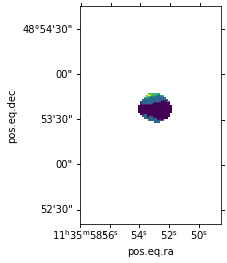

In [10]:
ax = plt.subplot(projection=wcs)
ax.imshow(rm)
#ax.set_xlim(x_lim[1], x_lim[0])
#ax.set_ylim(y_lim[1], y_lim[0])
plt.show()

In [11]:
avg_rm = np.nanmean(rm)
med_rm = np.nanmedian(rm)
mad_rm = np.nanmedian(np.abs(rm - np.nanmedian(rm)))
sigma_rm_obs = np.nanstd(rm)
med_sigma_phi = np.nanmedian(sigma_phi)
sigma_rm = np.sqrt(sigma_rm_obs**2 - med_sigma_phi**2)

In [12]:
print("<RM> : {0:.3f}".format(avg_rm))
print("med(RM): {0:.3f}".format(med_rm))
print("MAD(RM): {0:.3f}".format(mad_rm))
print("sigma(RM)_obs: {0: .3f}".format(sigma_rm_obs))
print("sigma(RM): {0:.3f}".format(sigma_rm))
print("med(sigma_phi): {0:.3f}".format(med_sigma_phi))

<RM> : 22.987
med(RM): 19.754
MAD(RM): 0.000
sigma(RM)_obs:  4.408
sigma(RM): 4.350
med(sigma_phi): 0.711
